# Telecom Churn Analysis

In [1]:
# importing required libraryies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

%matplotlib inline

*importing the data*

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
# checking datatype of the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer
- 75% customers have tenure less than 55 months
- Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

Text(0.5, 1.02, 'Count of Target variable per category')

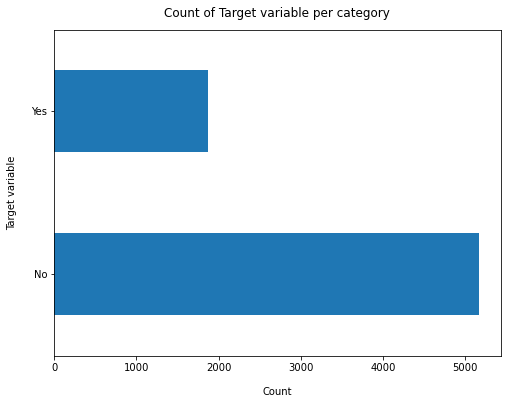

In [8]:
df['Churn'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel('Count',labelpad=14)
plt.ylabel('Target variable', labelpad=14)
plt.title('Count of Target variable per category', y=1.02)

In [9]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [10]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

- Data is highly imbalanced, ratio 73:27
- So we analyse the data with other features while taking the target values separately to get some insights.

In [11]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


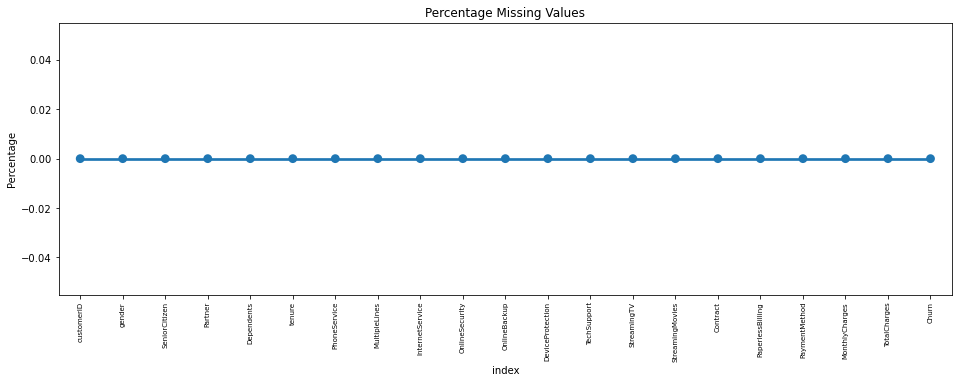

In [12]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.title('Percentage Missing Values')
plt.ylabel('Percentage')
plt.show()

# missing data -intution
- Here, we don't have any missing data.

General Thumb Rules:

- For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
- For features with very high number Of missing values- it is better to drop those columns as they give very less insight on analysis.
- As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, ls_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

# Data Cleaning
1. Create a copy of base data for manupulation & processing

In [13]:
cdf = df.copy()

2. Total Charges should be numeric amount. Let's convert it to numerical data type

In [14]:
cdf.TotalCharges =pd.to_numeric(cdf.TotalCharges, errors='coerce')
cdf.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

3. As we can see there are 11 missing values in TotalCharges column. Let's check these records

In [15]:
cdf.loc[cdf['TotalCharges'].isnull()== True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


4. Missing Value Treatement

Since the % of these records compared to total dataset is very low ie 15%, it is safe to ignore but we are filling it by its median

In [18]:
cdf['TotalCharges'].skew()

0.961642499724251

In [21]:
m =cdf['TotalCharges'].median()

In [22]:
cdf['TotalCharges'] = cdf['TotalCharges'].fillna(m)

5. Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between I
to 2 Yrs, tenure group of 13-24; so on...

In [27]:
cdf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
# getting the max tenure
print(cdf['tenure'].max())

72


In [30]:
# Group the tenure in bins of 12 months 
labels = ['{0} - {1}'.format(i, i + 11) for i in range(1, 72, 12)]

cdf['tenure_group'] = pd.cut(cdf.tenure, range(1,80,12), right= False, labels= labels)

In [34]:
cdf['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

6. Remove columns not required for processing

In [35]:
cdf.drop(columns=['customerID','tenure'], axis=1, inplace=True)
cdf.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# Data Exploration
'1. Plot distibution of individual predictors by churn

## Univariate Analysis

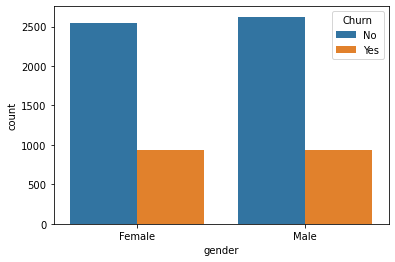

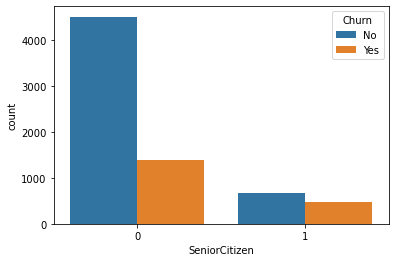

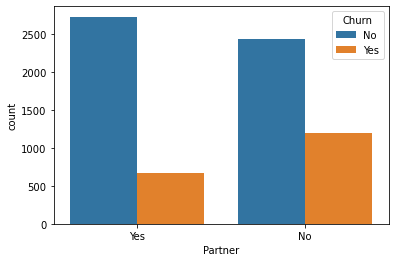

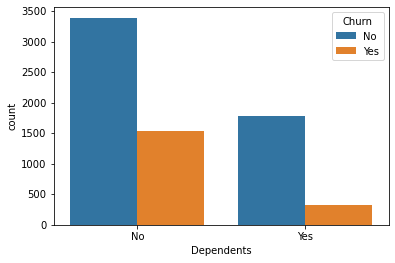

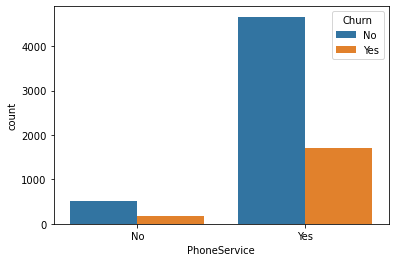

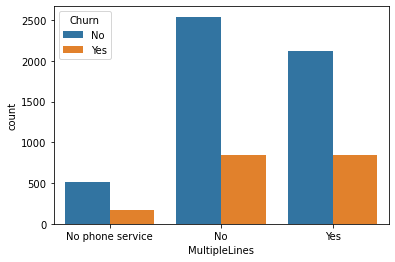

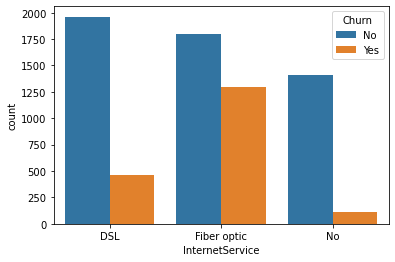

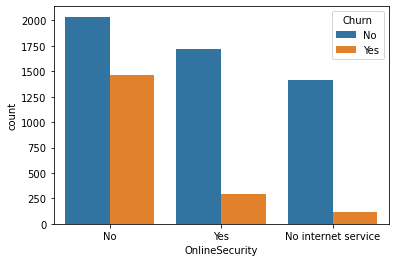

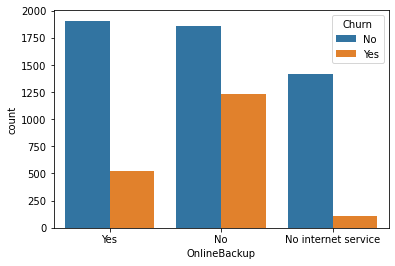

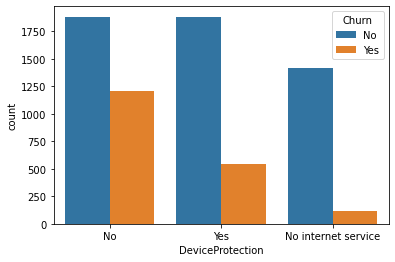

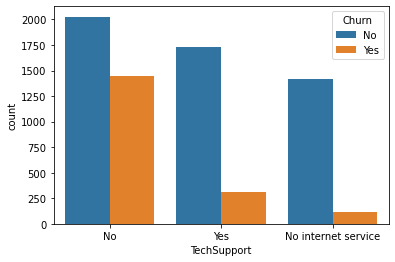

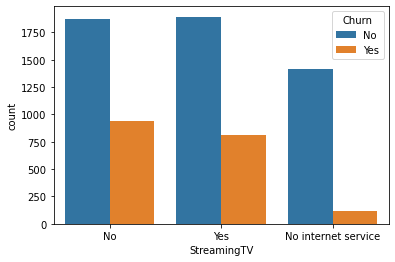

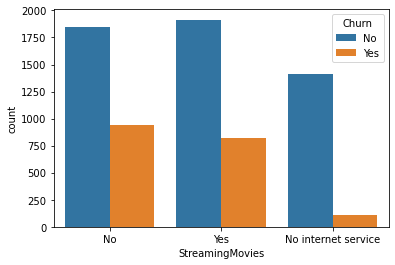

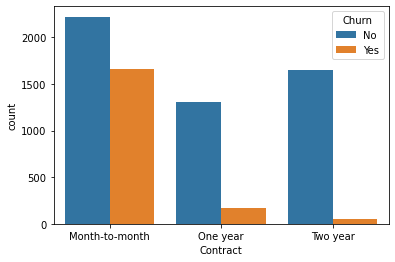

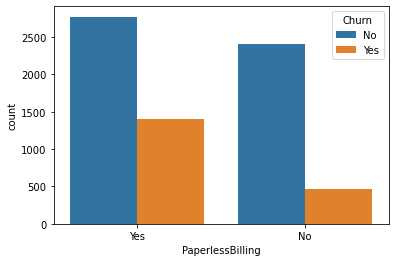

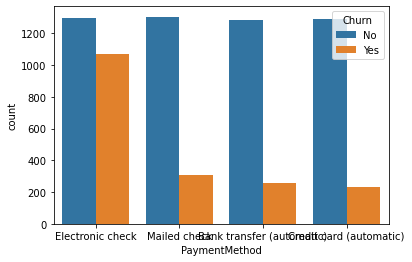

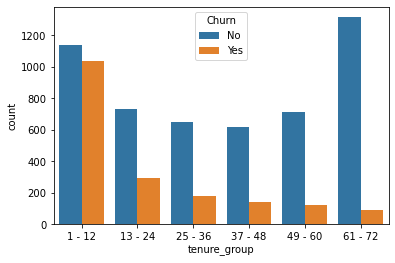

In [36]:
for i , pred in enumerate(cdf.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=cdf, x=pred, hue='Churn')

2. Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=l ; No = 0

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()

In [42]:
cdf['Churn']=le.fit_transform(cdf['Churn'])

In [43]:
cdf

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,13 - 24
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,61 - 72
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,1 - 12
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,1 - 12


3. Convert all the categorical variables into dummy variables

In [46]:
cdf_dummy = pd.get_dummies(cdf, drop_first=True)
cdf_dummy.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,0,56.95,1889.50,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,53.85,108.15,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


9. Relationship between Monthly Charges and Total Charges

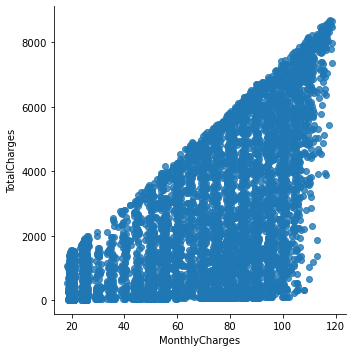

In [49]:
sns.lmplot(data=cdf_dummy, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Total Charges increase as Monthly Charges increase - as expected.

10. Churn by Monthly Charges and Total Charges

Text(0.5, 1.0, 'Monthly Charges by churn')

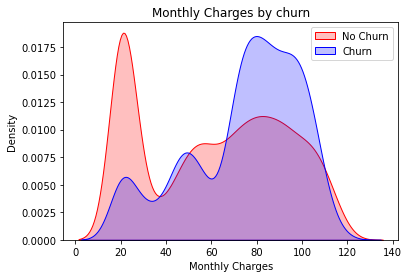

In [51]:
Mth = sns.kdeplot(cdf_dummy.MonthlyCharges[(cdf['Churn']== 0)], color='Red', shade= True)
Mth = sns.kdeplot(cdf_dummy.MonthlyCharges[(cdf['Churn']== 1)],ax=Mth, color='Blue', shade= True)

Mth.legend(['No Churn','Churn'],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly Charges by churn')

**Insight**: Churn is high when Monthly Charges ar high

Text(0.5, 1.0, 'Monthly Charges by churn')

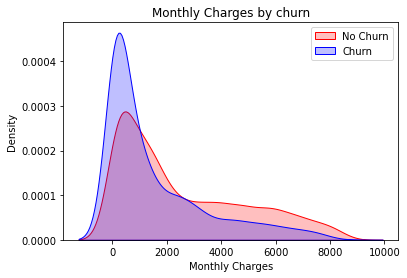

In [52]:
Mth = sns.kdeplot(cdf_dummy.TotalCharges[(cdf['Churn']== 0)], color='Red', shade= True)
Mth = sns.kdeplot(cdf_dummy.TotalCharges[(cdf['Churn']== 1)],ax=Mth, color='Blue', shade= True)

Mth.legend(['No Churn','Churn'],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly Charges by churn')

**Surprising insidht** as higher Churn at lower Total Charges
- However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear
- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.**

11. Build a corelation Of all predictors with 'Churn' 

<AxesSubplot:>

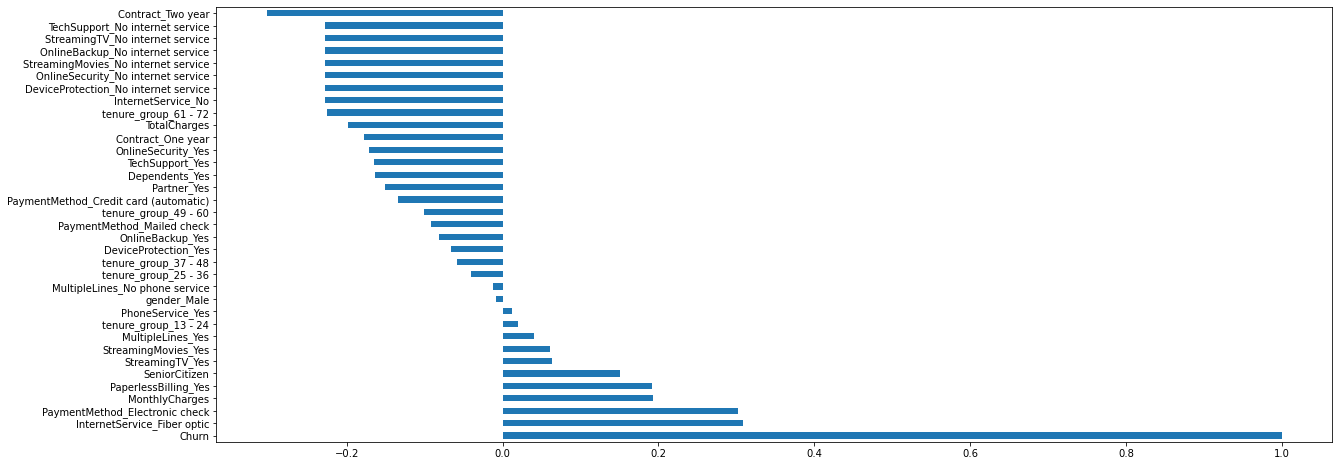

In [57]:
plt.figure(figsize=(20,8))
cdf_dummy.corr()['Churn'].sort_values(ascending= False).plot(kind='barh')

**Derived Insight:**
- **HIGH Churn** seen in case of **Month to month contracts, No online security, No Tech support, First year of subscription
and Fibre Optics Internet**
- **LOW Churn** is seens in case of **Long term contracts, Subscriptions without internet service and The customers
engaged for 5+ years**
- Factors like **Gender, Availability of PhoneService** and **No of multiple lines** have alomost **NO** impact on Churn
This is also evident from the **Heatmap** below

<AxesSubplot:>

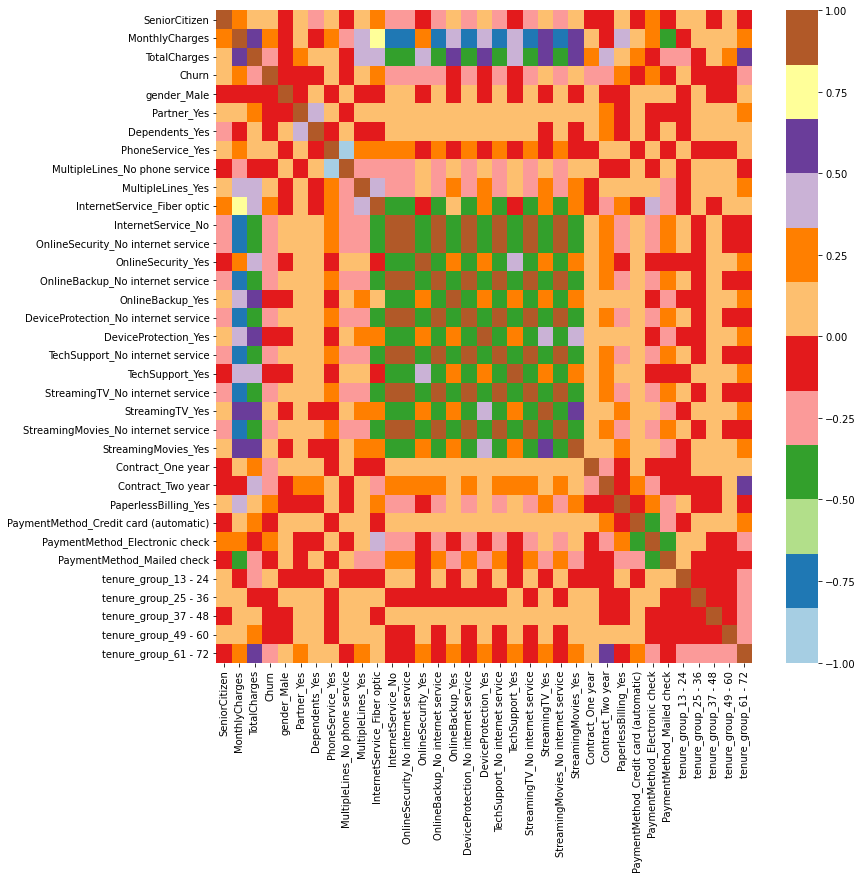

In [60]:
plt.figure(figsize=(12,12))
sns.heatmap(cdf_dummy.corr(), cmap='Paired')

# Bivariate Analysis

In [61]:
new_df1= cdf.loc[cdf['Churn']==0]
new_df2= cdf.loc[cdf['Churn']==1]

In [62]:
def uniplot(df,col,title,hue=None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize']=20
    plt.rcParams['axes.titlesize']=22
    plt.rcParams['axes.titlepad']=30
    
    temp = pd.Series(data=hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 +4*len(temp.unique())
    fig.set_size_inches(width,8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette= 'bright')
    
    plt.show()

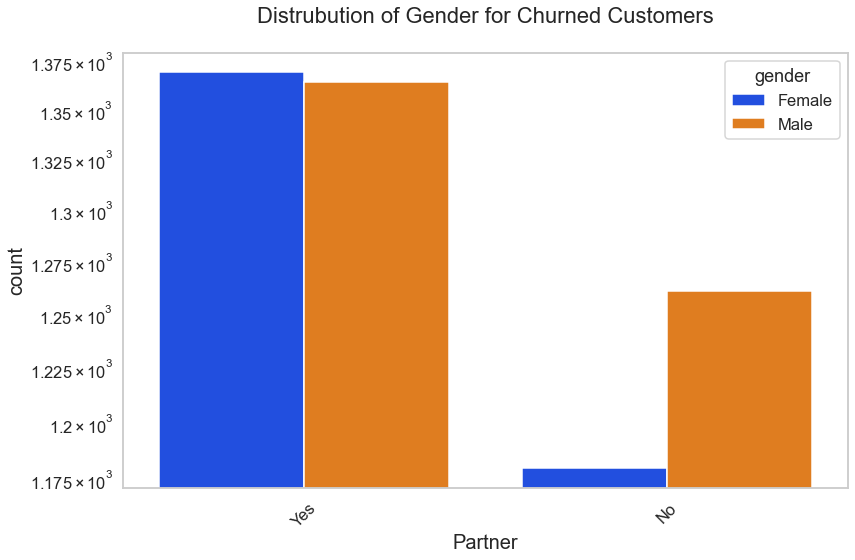

In [63]:
uniplot(new_df1, col='Partner', title='Distrubution of Gender for Churned Customers', hue='gender')

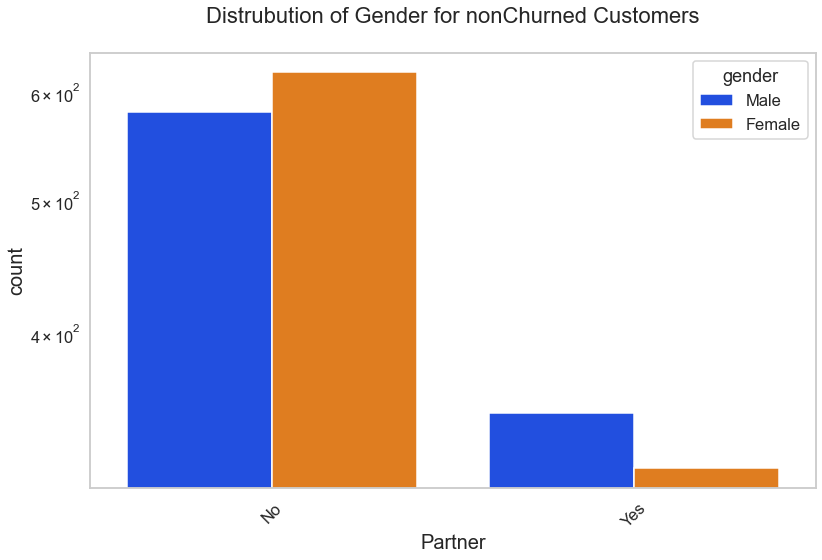

In [64]:
uniplot(new_df2, col='Partner', title='Distrubution of Gender for nonChurned Customers', hue='gender')

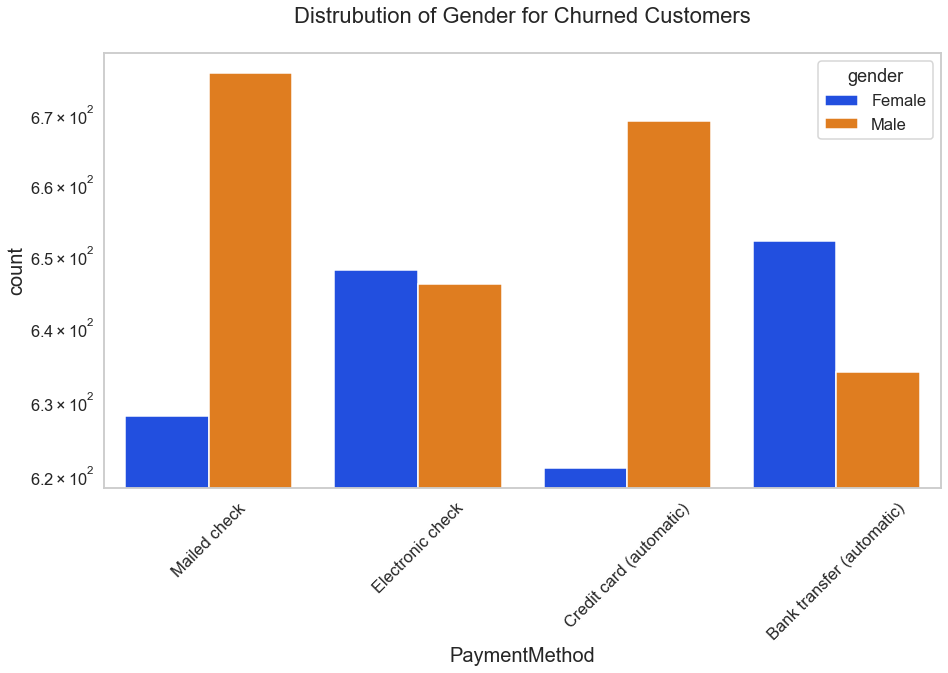

In [65]:
uniplot(new_df1, col='PaymentMethod', title='Distrubution of Gender for Churned Customers', hue='gender')

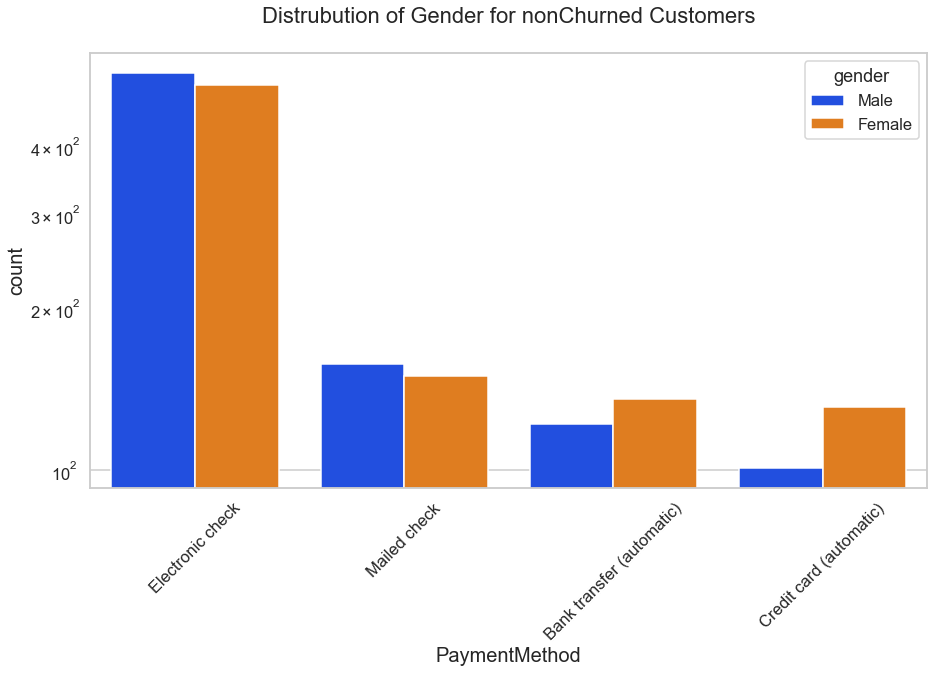

In [66]:
uniplot(new_df2, col='PaymentMethod', title='Distrubution of Gender for nonChurned Customers', hue='gender')

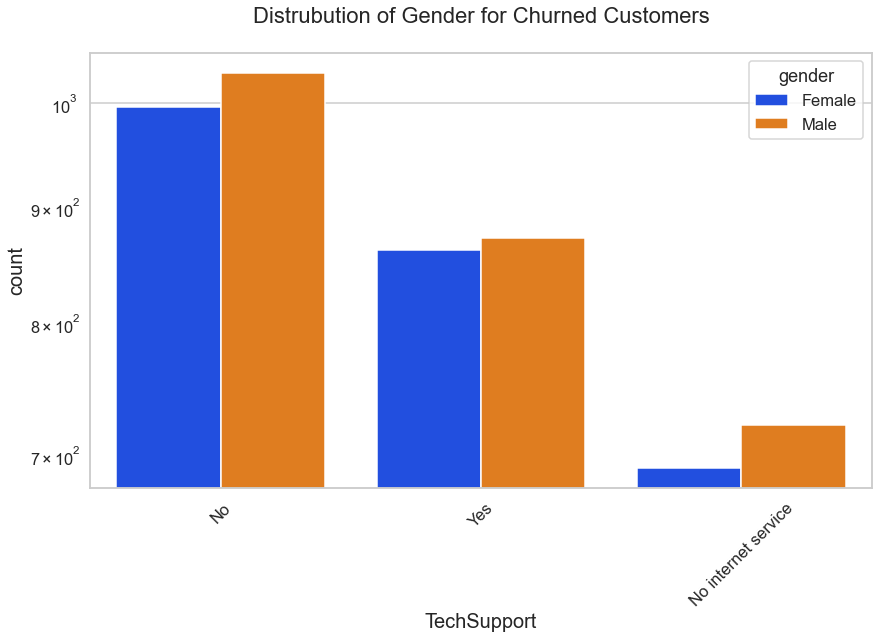

In [67]:
uniplot(new_df1, col='TechSupport', title='Distrubution of Gender for Churned Customers', hue='gender')

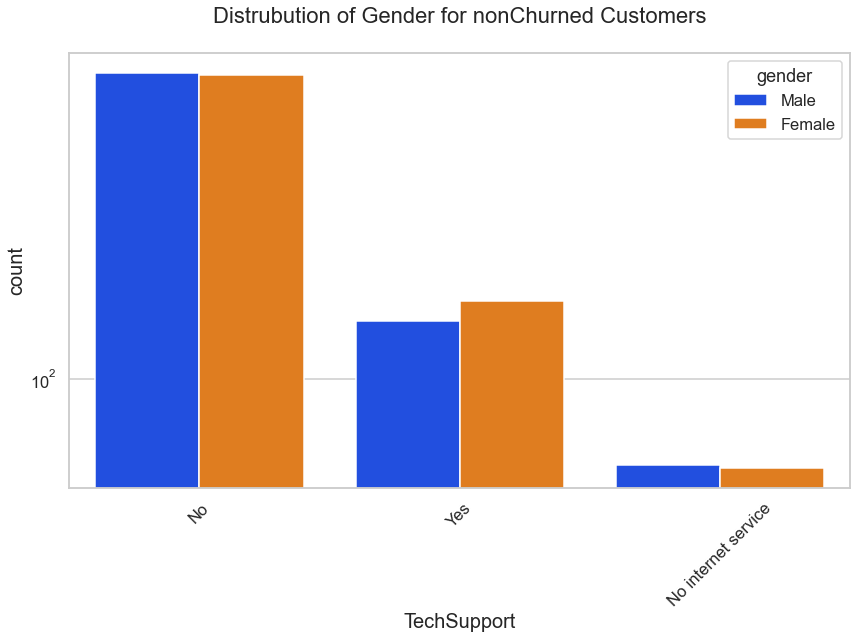

In [68]:
uniplot(new_df2, col='TechSupport', title='Distrubution of Gender for nonChurned Customers', hue='gender')

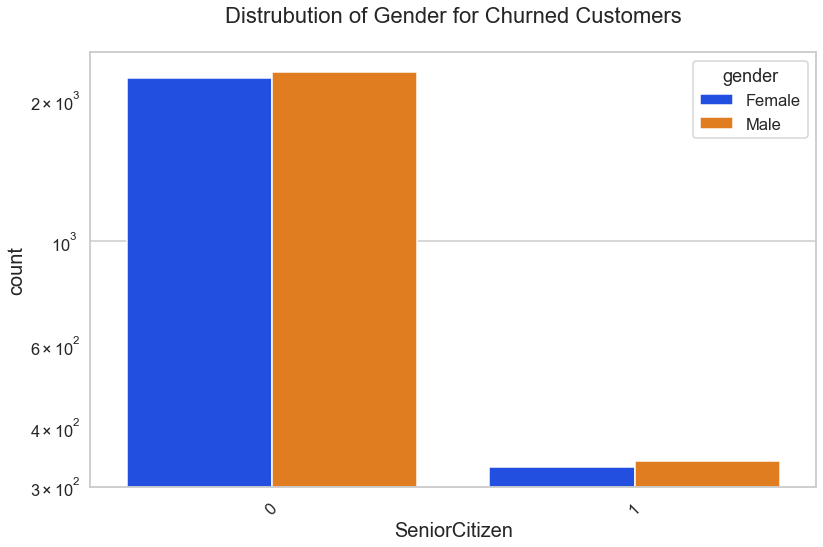

In [69]:
uniplot(new_df1, col='SeniorCitizen', title='Distrubution of Gender for Churned Customers', hue='gender')

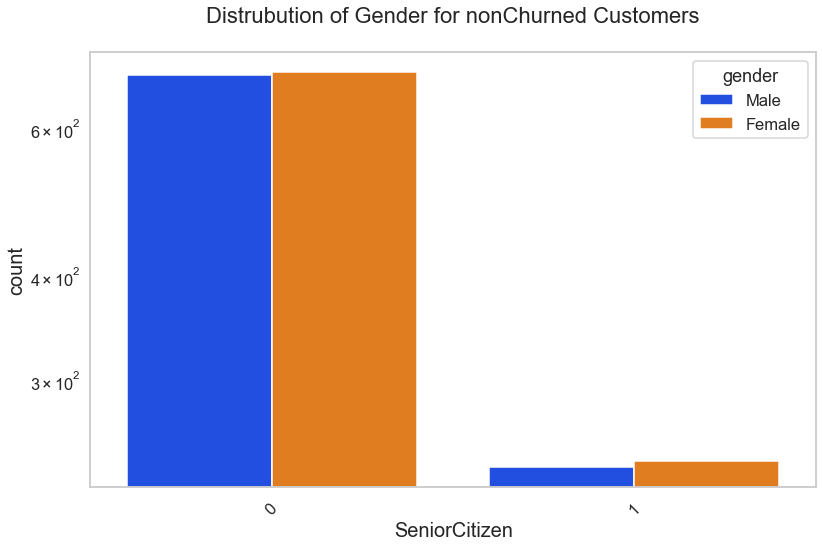

In [70]:
uniplot(new_df2, col='SeniorCitizen', title='Distrubution of Gender for nonChurned Customers', hue='gender')

# CONCLUSION
These are some of the quick insights from this exercise:
1. Electronic check medium are the highest chumers
2. Contract - Monthly customers are more likely to churn because Of no Øntract terms. as they are free to go customers.
3. No Online security, No Tech Support category are high chumers
4. Non senior Citizens are high chumers

In [71]:
cdf_dummy.to_csv('telecom_churn_dummy.csv')